In [1]:
# ETL Pipeline 


import pandas as pd
import os
import numpy as np

from sqlalchemy import create_engine , text


In [2]:
project_dir = "C:\\Users\\HP\\Desktop\\major project"


In [3]:
messages= pd.read_csv("data/disaster_messages.csv")

In [4]:
def load_config(config_path):
    config_df = pd.read_csv(config_path)
    # Process the configuration DataFrame as needed
    return config_d

In [5]:
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [6]:
messages.shape


(26248, 4)

In [7]:
categories= pd.read_csv("data/disaster_categories.csv")

In [8]:
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [9]:
categories.shape

(26248, 2)

In [10]:
df = pd.merge(messages, categories , on ='id', how='inner')

In [11]:
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [12]:
df.shape

(26386, 5)

In [13]:
len(pd.unique(df.id))

26180

In [14]:
#create a dataframe of the 36 individual category columns 
categories = categories['categories'].str.split(pat=";",expand =True)

In [15]:
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [16]:
row= categories.iloc[0]
category_colnames = list(row.apply(lambda col: col.split('-')[0]))

In [17]:
category_colnames

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [18]:
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [19]:
categories.shape

(26248, 36)

In [20]:
for column in categories:
    categories[column] = categories[column].str[-1]
    categories[column] = categories[column].astype(int)
categories.head()    

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
categories.shape

(26248, 36)

In [22]:
df.drop(columns=['categories'],axis=1, inplace=True)

In [23]:
df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [24]:
df.shape

(26386, 4)

In [25]:
categories.shape

(26248, 36)

In [26]:
df= pd.concat([df, categories],axis=1,sort=False)


In [27]:
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,30261,The training demonstrated how to enhance micro...,NaN,news,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26382,30262,A suitable candidate has been selected and OCH...,NaN,news,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26383,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26384,30264,"Some 2,000 women protesting against the conduc...",NaN,news,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.shape

(26386, 40)

In [29]:

print("There are {} duplicated messages from the combined dataframe.".format(df['id'].duplicated().sum()))
print("There are {} duplicated messages from the messages csv file.".format(messages['id'].duplicated().sum()))

There are 206 duplicated messages from the combined dataframe.
There are 68 duplicated messages from the messages csv file.


In [30]:
# drop suplicates
df.drop_duplicates(subset=["id"],inplace=True)

In [31]:

df.shape

(26180, 40)

In [32]:
df.duplicated().sum()

0

In [33]:
df.isnull().sum(axis=0)

id                            0
message                       0
original                  16027
genre                         0
related                     138
request                     138
offer                       138
aid_related                 138
medical_help                138
medical_products            138
search_and_rescue           138
security                    138
military                    138
child_alone                 138
water                       138
food                        138
shelter                     138
clothing                    138
money                       138
missing_people              138
refugees                    138
death                       138
other_aid                   138
infrastructure_related      138
transport                   138
buildings                   138
electricity                 138
tools                       138
hospitals                   138
shops                       138
aid_centers                 138
other_in

In [34]:
df.shape

(26180, 40)

In [35]:
len(pd.unique(df.id))

26180

In [36]:
len(pd.unique(df.message))

26177

In [37]:
pd.unique(df.message)

array(['Weather update - a cold front from Cuba that could pass over Haiti',
       'Is the Hurricane over or is it not over',
       'Looking for someone but no name', ...,
       "Proshika, operating in Cox's Bazar municipality and 5 other unions, Ramu and Chokoria, assessment, 5 kg rice, 1,5 kg lentils to 700 families.",
       'Some 2,000 women protesting against the conduct of the elections were teargassed as they tried to converge on the local electoral commission offices in the southern oil city of Port Harcourt.',
       'A radical shift in thinking came about as a result of this meeting, recognizing that HIV/AIDS is at the core of the humanitarian crisis and identifying the crisis itself as a function of the HIV/AIDS pandemic.'],
      dtype=object)

In [38]:
pd.unique(df.medical_help)

array([ 0.,  1., nan])

In [39]:
df = df[pd.notnull(df.related)]
df.shape

(26042, 40)

In [40]:
df.duplicated().sum()

0

In [41]:
df.tail()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
26243,30107,"""The pattern is always the same: steal, loot, ...",NaN,news,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26244,30108,"Sirajganj, Bangladesh. When the rain-swollen J...",NaN,news,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26245,30109,Damage to the Nacala rail corridor by the rain...,NaN,news,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26246,30110,"Thus, an armed drone strike in Pakistan, a Nig...",NaN,news,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26247,30111,"This year's 16 Days theme, ""From Peace in the ...",NaN,news,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df.isnull().sum(axis=0)

id                            0
message                       0
original                  15889
genre                         0
related                       0
request                       0
offer                         0
aid_related                   0
medical_help                  0
medical_products              0
search_and_rescue             0
security                      0
military                      0
child_alone                   0
water                         0
food                          0
shelter                       0
clothing                      0
money                         0
missing_people                0
refugees                      0
death                         0
other_aid                     0
infrastructure_related        0
transport                     0
buildings                     0
electricity                   0
tools                         0
hospitals                     0
shops                         0
aid_centers                   0
other_in

In [43]:
df.shape

(26042, 40)

In [44]:
len(pd.unique(df.id))

26042

In [45]:
df = df[pd.notnull(df.related)]
df.shape

(26042, 40)

In [46]:
df.tail()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
26243,30107,"""The pattern is always the same: steal, loot, ...",NaN,news,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26244,30108,"Sirajganj, Bangladesh. When the rain-swollen J...",NaN,news,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26245,30109,Damage to the Nacala rail corridor by the rain...,NaN,news,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26246,30110,"Thus, an armed drone strike in Pakistan, a Nig...",NaN,news,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26247,30111,"This year's 16 Days theme, ""From Peace in the ...",NaN,news,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df.nunique()

id                        26042
message                   26039
original                   9630
genre                         3
related                       3
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
child_alone                   1
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_in

In [48]:
pd.unique(df.related)

array([1., 0., 2.])

In [49]:
df=df[df.related != 2]
df.shape

(25852, 40)

In [50]:
engine = create_engine('sqlite:///{}/data//DisasterResponse.db'.format(project_dir))
df.to_sql('messages', engine, index=False, if_exists='replace')

25852

In [51]:
#exploratory data analysis

In [52]:
from matplotlib import pyplot as plt

In [53]:
%matplotlib inline 

In [54]:
def plot_category_distribution(df):
    category_counts= df.drop(columns=['id','message','original','genre']).sum().sort_values(ascending=False)
    category_names = category_counts.index
    
    plt.figure(figsize=(10,8))
    plt.barh(category_names, category_counts, color='skyblue')
    plt.xlabel('Number of messages')
    plt.ylabel('Categories')
    plt.title('Distribution of Messages across Categories')
    plt.gca()
    plt.tight_layout()
    plt.show()

In [55]:
def main():
    print("plotting category distribution...")
    plot_category_distribution(df)
    
    

plotting category distribution...


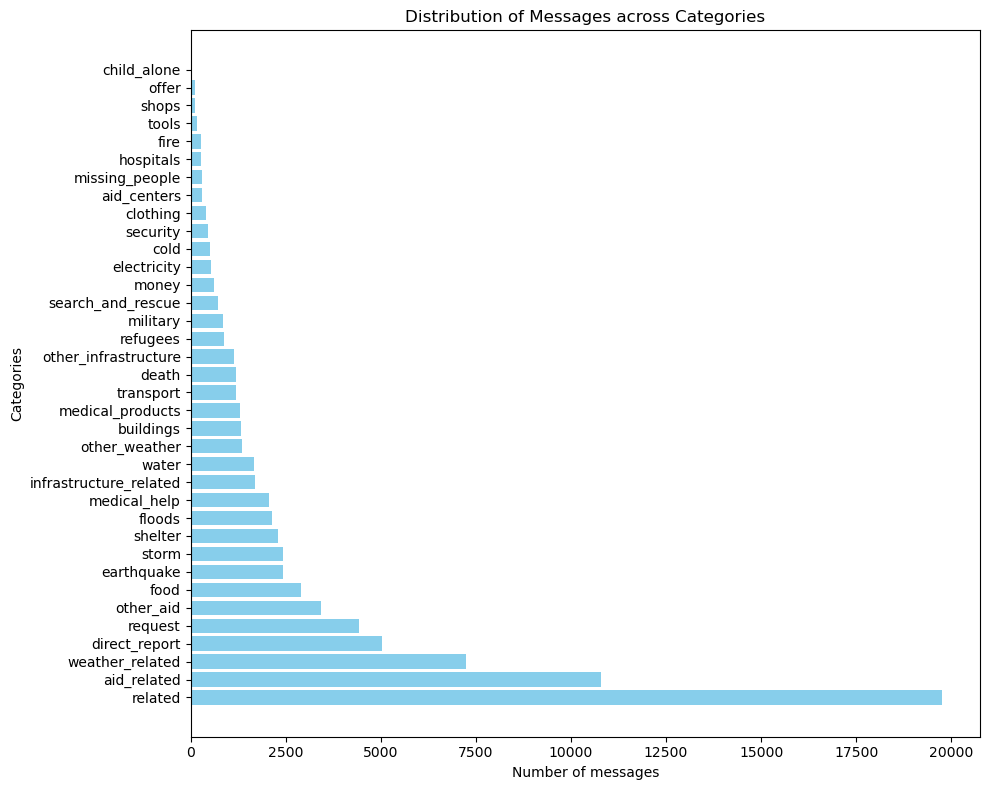

In [56]:
if __name__=="__main__":
    main()


In [57]:
def plot_genre_piechart(df, genre='direct'):
    df_genre = df[df['genre'] == genre]    
    category_counts = df_genre.drop(columns =['id','message','original','genre']).sum()
    top_5_categories = category_counts.sort_values(ascending= False).head(5)
    plt.figure(figsize=(5,5))
    plt.pie(top_5_categories,  labels= top_5_categories.index, autopct='%1.1f%%',startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Top 5 categories in {genre.capitalize()} Genre')
    plt.axis('equal')
    plt.show()

In [58]:
def main():
    print('Plotting genre pie chart....')
    plot_genre_piechart(df, genre = 'direct')
    

Plotting genre pie chart....


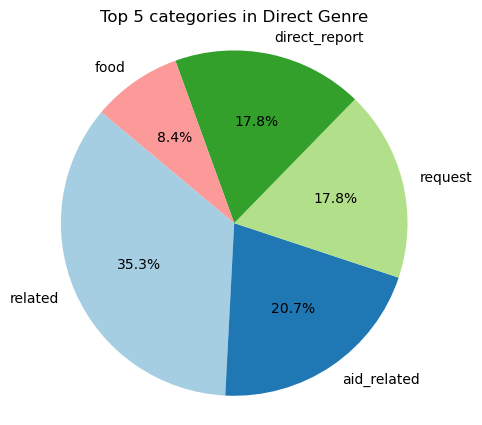

In [59]:
if __name__ == '__main__':
    main()

In [60]:
def get_top_categories_by_genre(df, genre, top_n=5):
    genre_df = df[df['genre'] == genre]
    category_counts = genre_df.drop(columns=['id', 'message', 'original', 'genre']).sum().sort_values(ascending=False)
    top_categories = category_counts.head(top_n)
    return top_categories

In [61]:
def plot_pie_chart(data, genre):
    labels = data.index
    sizes = data.values
    colors = plt.cm.Paired(range(len(labels)))
    explode = [0.1] + [0] * (len(labels) - 1)  

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.title(f'Top {len(labels)} Categories in {genre.capitalize()} Genre')
    plt.axis('equal')  
    plt.show()


Plotting top categories for genre: news


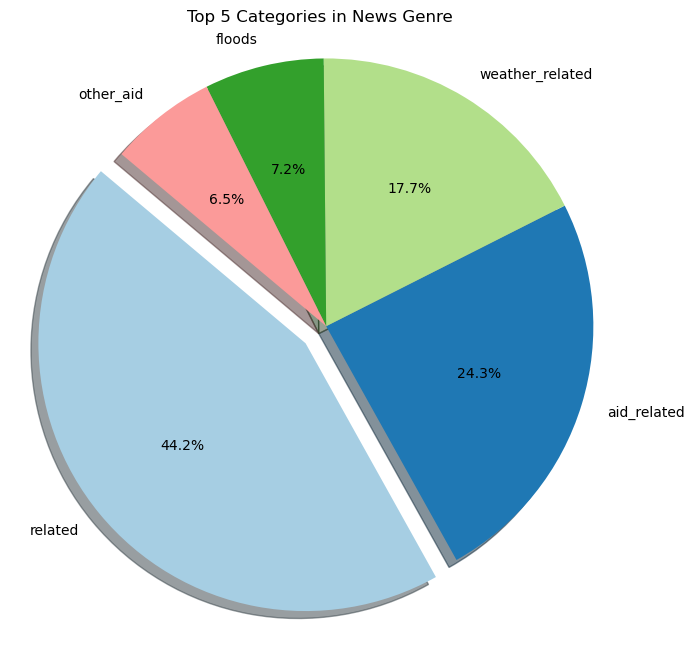

In [62]:
def main():
    genre = 'news'
    print(f'Plotting top categories for genre: {genre}')
    top_categories = get_top_categories_by_genre(df, genre)
    plot_pie_chart(top_categories, genre)

if __name__ == '__main__':
    main()

In [63]:
def get_top_categories_by_genre(df, genre, top_n=5):
    genre_df = df[df['genre'] == genre]
    category_counts = genre_df.drop(columns=['id', 'message', 'original', 'genre']).sum().sort_values(ascending=False)
    top_categories = category_counts.head(top_n)
    return top_categories

In [64]:
def plot_pie_chart(data, genre):
    labels = data.index
    sizes = data.values
    colors = plt.cm.Paired(range(len(labels)))
    explode = [0.1] + [0] * (len(labels) - 1)  

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.title(f'Top {len(labels)} Categories in {genre} Genre')
    plt.axis('equal')  

Plotting top categories for genre: social


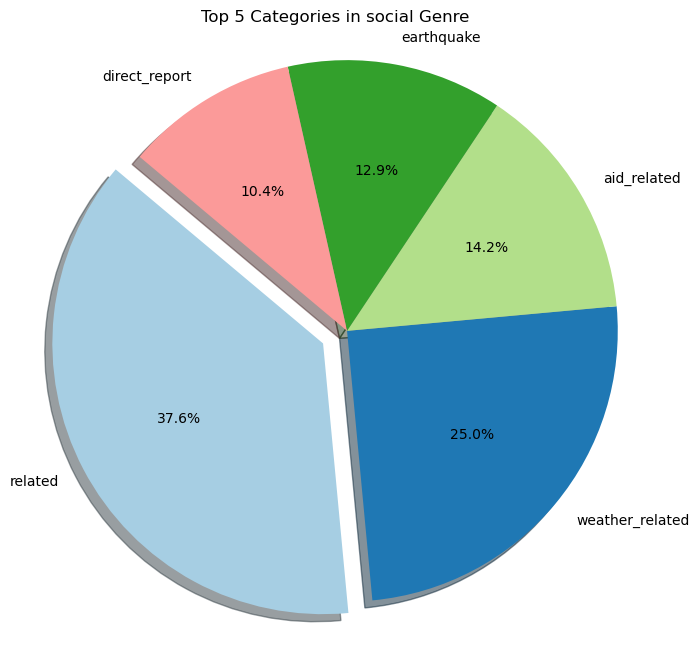

In [65]:
def main():
    genre = 'social'
    print(f'Plotting top categories for genre: {genre}')
    top_categories = get_top_categories_by_genre(df, genre)
    plot_pie_chart(top_categories, genre)

if __name__ == '__main__':
    main()

In [66]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [67]:
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
import nltk

In [68]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [69]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [70]:
def plot_word_cloud(df):
    text = ' '.join(df['message'].apply(preprocess_text))
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Messages')
    plt.show()

Generating word cloud...


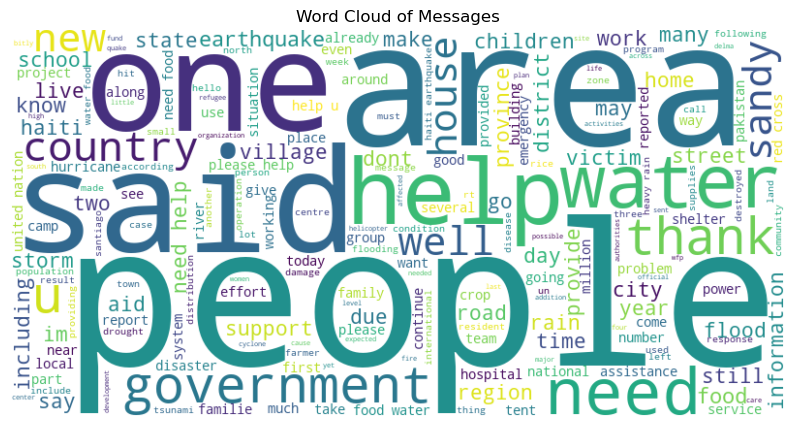

In [71]:
def main():
    print('Generating word cloud...')
    plot_word_cloud(df)

if __name__ == '__main__':
    main()